In [1]:
import autograd.numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from autograd import grad
import pandas as pd

# compute linear combination of input point
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# the convex softmax cost function
def softmax(w):
    cost = np.sum(np.log(1 + np.exp(-y*model(x,w))))
    return cost/float(np.size(y))

def gradient_descent(g,alpha,max_its,w):
    gradient = grad(g)

    weight_history = [w]
    cost_history = [g(w)]

    for k in range(max_its):
        grad_eval = gradient(w)

        w = w - alpha*grad_eval

        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

# find no. of misclassifications
def misclass(w):
    mis_no = 0
    y_hat = -np.sign(model(x,w))
    for i in range(y.size):
        if y_hat[i] != y[0][i]:
            mis_no += 1
    return mis_no

# plotting efficacy 
def EP(cost_history,weight_history):
    # No. of steps
    step_nb = len(cost_history)
    step_vals = np.linspace(1,step_nb,step_nb)
    mis_no = [misclass(i) for i in weight_history]

    plt.style.use('default')

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Efficacy')
    ax1.plot(step_vals,cost_history)
    ax1.set_title('Cost history')
    ax1.set(xlabel='Iteration step')
    ax2.plot(step_vals,mis_no)
    ax2.set_title('No. of misclassification')
    ax2.set(xlabel='Iteration step')

    plt.show()
    return

# |g> frequency

In [2]:
# import data
x_url = pd.read_csv('x_vals_gstatefreq.csv',header=None)
y_url = pd.read_csv('y_vals.csv',header=None)

In [3]:
# get input and output of dataset
x = np.array(x_url).T
y = np.array(y_url).T

print(np.shape(x))
print(np.shape(y))

print(x)
print(y)

(2, 2000)
(1, 2000)
[[-4.54e-04 -7.39e-04 -7.77e-04 ... -6.96e-04 -6.12e-04 -7.26e-04]
 [-2.57e-04 -6.58e-05 -1.43e-04 ...  7.63e-04  3.57e-04  5.47e-04]]
[[-1. -1. -1. ...  1.  1.  1.]]


In [4]:
# parameters for running gradient descent
alpha = 1.      # step length
max_its = 5000  # no. of iterations
w = 20.*np.ones(np.shape(x)[0]+1) # fitting parameters

# running gradient descent
weight_history1,cost_history1 = gradient_descent(softmax,alpha,max_its,w)

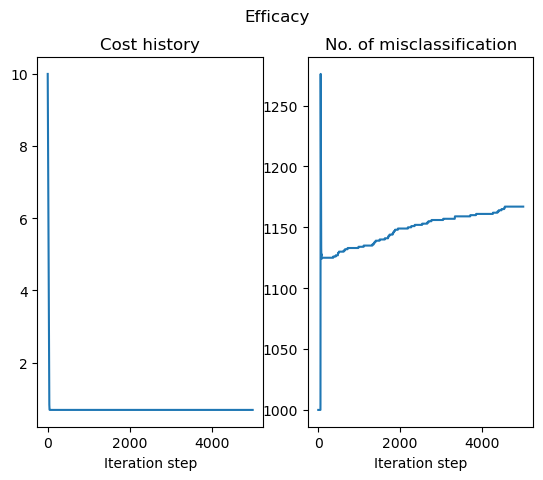

In [5]:
EP(cost_history1,weight_history1)

In [6]:
slope = -weight_history1[-1][1]/weight_history1[-1][2]
y_intercept = -weight_history1[-1][0]/weight_history1[-1][2]
best_fit = []
x_vals = np.linspace(-0.001,0.0005,100)
for i in x_vals:
    best_fit.append(slope*i + y_intercept)

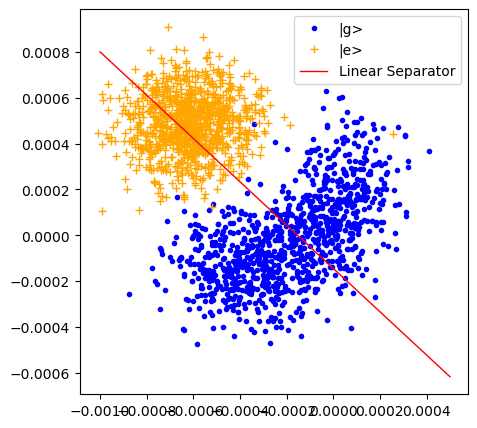

In [7]:
"""plot IQ plot with line of best fit"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x[0][:999], x[1][:999], 'b.')
ax.plot(x[0][999:],x[1][999:],'+',color='orange')
ax.plot(x_vals,best_fit,'r-',linewidth=1)
plt.legend(['|g>','|e>','Linear Separator'])

In [8]:
# infidelity calculation
print('Infidelity: ', misclass(weight_history1[-1])/len(x[0])*100,'%')

Infidelity:  58.35 %


# maximum S$_{2,1}$ distance frequency

In [9]:
# import data
x_url = pd.read_csv('x_vals_maxdistfreq.csv',header=None)
y_url = pd.read_csv('y_vals.csv',header=None)

In [10]:
# get input and output of dataset
x = np.array(x_url).T
y = np.array(y_url).T

print(np.shape(x))
print(np.shape(y))

print(x)
print(y)

(2, 2000)
(1, 2000)
[[ 2.85e-04  3.82e-06  8.80e-05 ...  3.35e-04 -6.43e-05  1.43e-04]
 [ 7.53e-04  8.21e-04  7.13e-04 ... -6.21e-06 -5.38e-07  1.23e-04]]
[[-1. -1. -1. ...  1.  1.  1.]]


In [11]:
# parameters for running gradient descent
alpha = 1.      # step length
max_its = 5000  # no. of iterations
w = 20.*np.ones(np.shape(x)[0]+1) # fitting parameters

# running gradient descent
weight_history1,cost_history1 = gradient_descent(softmax,alpha,max_its,w)

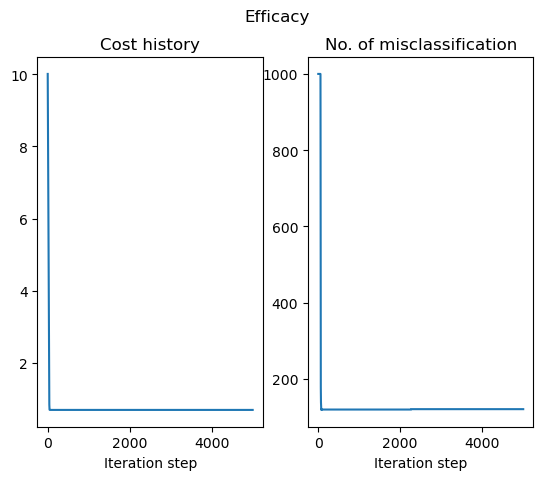

In [12]:
EP(cost_history1,weight_history1)

In [13]:
slope = -weight_history1[-1][1]/weight_history1[-1][2]
y_intercept = -weight_history1[-1][0]/weight_history1[-1][2]
best_fit = []
x_vals = np.linspace(-0.001,0.0005,100)
for i in x_vals:
    best_fit.append(slope*i + y_intercept)

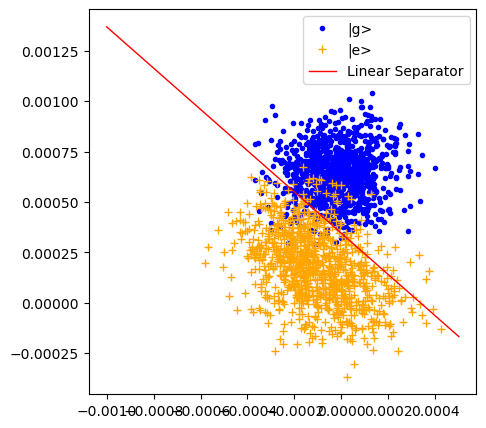

In [14]:
"""plot IQ plot with line of best fit"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x[0][:999], x[1][:999], 'b.')
ax.plot(x[0][999:],x[1][999:],'+',color='orange')
ax.plot(x_vals,best_fit,'r-',linewidth=1)
plt.legend(['|g>','|e>','Linear Separator'])

In [15]:
# infidelity calculation
print('Infidelity: ', misclass(weight_history1[-1])/len(x[0])*100,'%')

Infidelity:  6.05 %


# different frequencies to check SVM efficacy

In [16]:
# import data
x_url = pd.read_csv('x_vals_difffreq.csv',header=None)
y_url = pd.read_csv('y_vals.csv',header=None)

In [17]:
# get input and output of dataset
x = np.array(x_url).T
y = np.array(y_url).T

print(np.shape(x))
print(np.shape(y))

print(x)
print(y)

(2, 2000)
(1, 2000)
[[ 1.13544411e-04  9.43398845e-05  3.35299585e-04 ... -6.96092495e-04
  -6.12124102e-04 -7.26366416e-04]
 [ 6.62694161e-04  6.84831990e-04  8.43548274e-04 ...  7.63459073e-04
   3.56993580e-04  5.47409931e-04]]
[[-1. -1. -1. ...  1.  1.  1.]]


In [18]:
# parameters for running gradient descent
alpha = 1.      # step length
max_its = 5000  # no. of iterations
w = 20.*np.ones(np.shape(x)[0]+1) # fitting parameters

# running gradient descent
weight_history1,cost_history1 = gradient_descent(softmax,alpha,max_its,w)

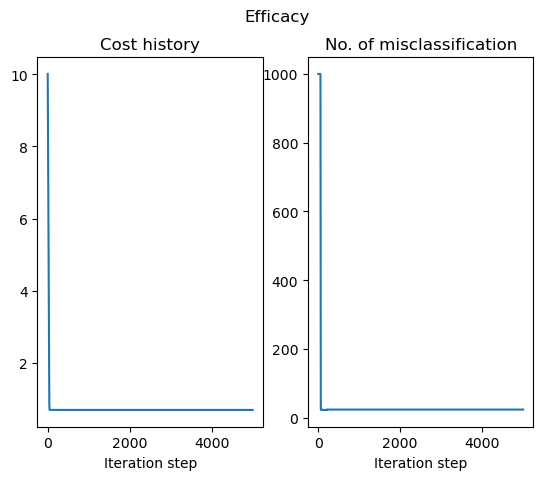

In [19]:
EP(cost_history1,weight_history1)

In [20]:
slope = -weight_history1[-1][1]/weight_history1[-1][2]
y_intercept = -weight_history1[-1][0]/weight_history1[-1][2]
best_fit = []
x_vals = np.linspace(-0.001,0.0005,100)
for i in x_vals:
    best_fit.append(slope*i + y_intercept)

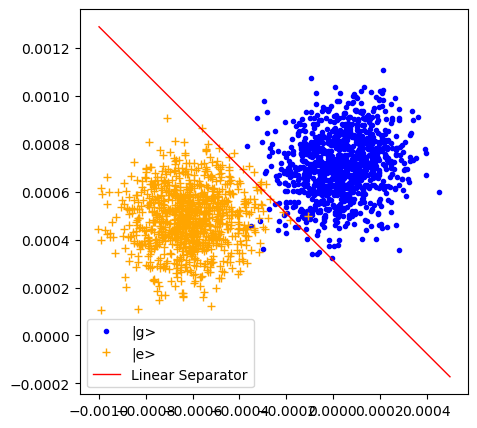

In [21]:
"""plot IQ plot with line of best fit"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(x[0][:999], x[1][:999], 'b.')
ax.plot(x[0][999:],x[1][999:],'+',color='orange')
ax.plot(x_vals,best_fit,'r-',linewidth=1)
plt.legend(['|g>','|e>','Linear Separator'])

In [22]:
# infidelity calculation
print('Infidelity: ', misclass(weight_history1[-1])/len(x[0])*100,'%')

Infidelity:  1.2 %
